In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Titanic-Dataset.csv",sep=',')

# EDA

In [3]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [4]:
df.tail().T

,886,887,888,889,890
PassengerId,887,888,889,890,891
Survived,0,1,0,1,0
Pclass,2,1,3,1,3
Name,"Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,male,male
Age,27.0,19.0,NaN,26.0,32.0
SibSp,0,0,1,0,0
Parch,0,0,2,0,0
Ticket,211536,112053,W./C. 6607,111369,370376
Fare,13.0,30.0,23.45,30.0,7.75


## null values

In [5]:
df.shape

(891, 12)

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

In [7]:
df=df.drop(columns=["Cabin","Name"],axis=1)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S


In [10]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [12]:
df["Embarked"]=df["Embarked"].fillna("C")

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df["Age"]=df["Age"].astype("int")

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [16]:
df["Sex"]=df["Sex"].map({"male":1,"female":0})

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22,1,0,A/5 21171,7.2500,S
1,2,1,1,0,38,1,0,PC 17599,71.2833,C
2,3,1,3,0,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,35,1,0,113803,53.1000,S
4,5,0,3,1,35,0,0,373450,8.0500,S


In [18]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

# Count plots

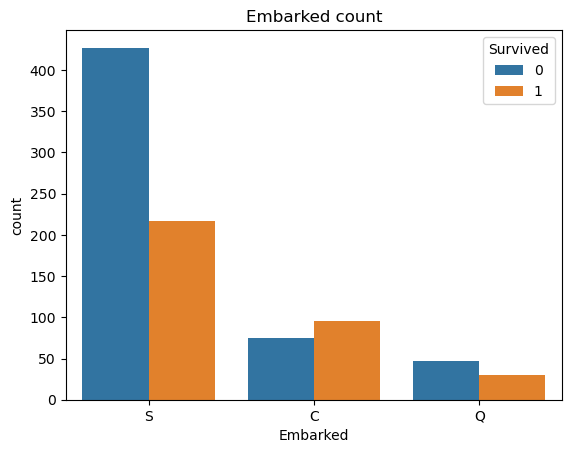

In [19]:
sns.countplot(df,x="Embarked",hue="Survived")
plt.title("Embarked count")
plt.show()

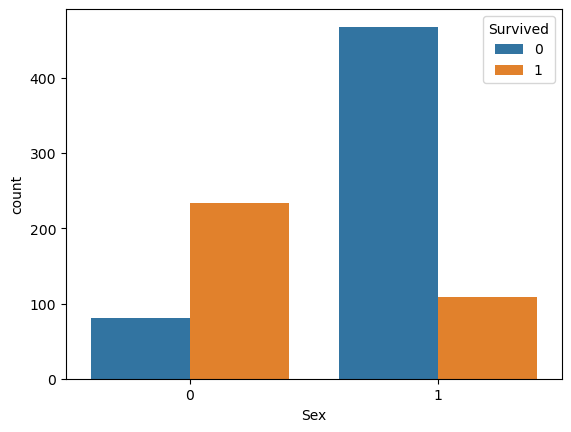

In [20]:
sns.countplot(df,hue="Survived",x="Sex")
plt.show()

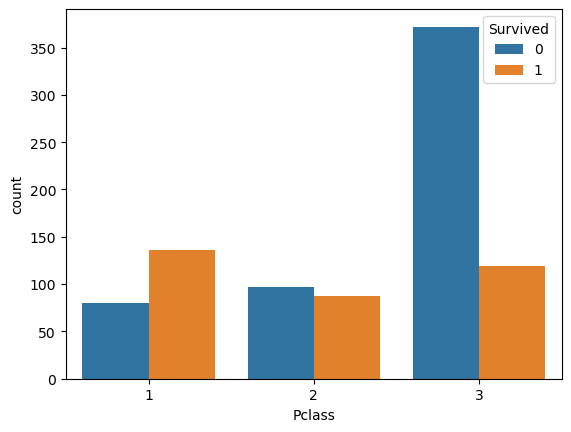

In [21]:
sns.countplot(df,hue="Survived",x="Pclass")
plt.show()

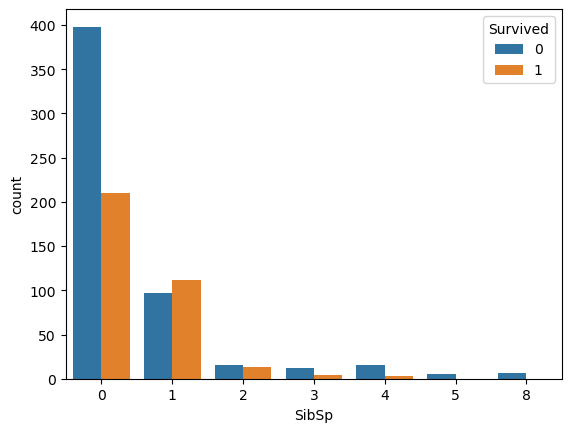

In [22]:
sns.countplot(df,hue="Survived",x="SibSp")
plt.show()

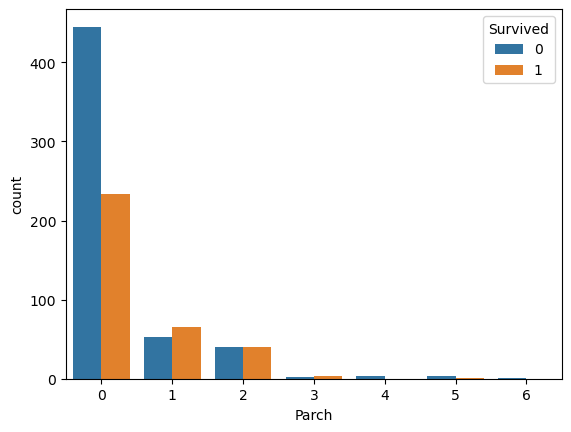

In [23]:
sns.countplot(df,hue="Survived",x="Parch")
plt.show()

# Distribution plot for age

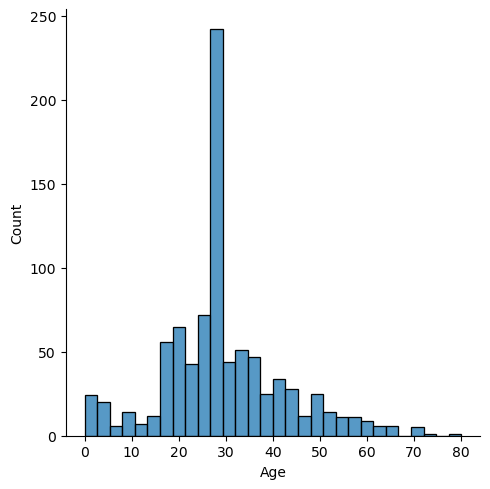

In [24]:
sns.displot(df["Age"])
plt.show()

# Outlier detection

<Axes: >

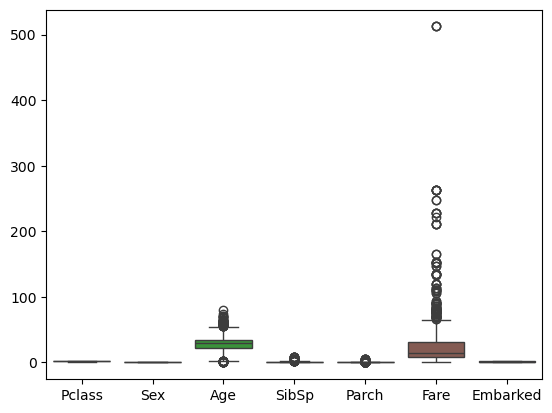

In [30]:
sns.boxplot(X)

C:\Users\dheen\AppData\Local\Temp\ipykernel_16356\2380109835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[column]=dt[column].clip(lower=low,upper=up)
C:\Users\dheen\AppData\Local\Temp\ipykernel_16356\2380109835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[column]=dt[column].clip(lower=low,upper=up)
C:\Users\dheen\AppData\Local\Temp\ipykernel_16356\2380109835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

<Axes: >

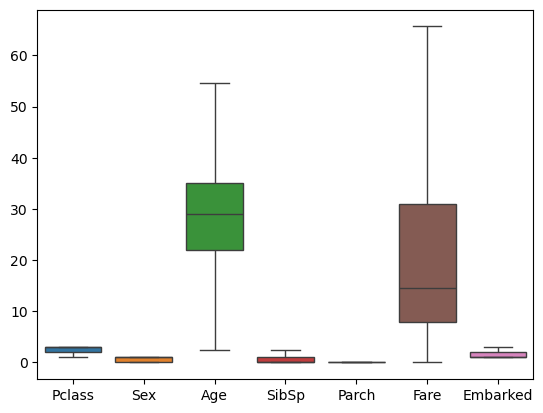

In [31]:
def deoutlier(dt,column):
    q1=dt[column].quantile(0.25)
    q3=dt[column].quantile(0.75)
    iqr=q3-q1
    low=q1-iqr*1.5
    up=q3+iqr*1.5
    dt[column]=dt[column].clip(lower=low,upper=up)
for i in ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]:
    deoutlier(X,i)
sns.boxplot(X)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [26]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22,1,0,A/5 21171,7.25,S


In [27]:
df["Embarked"]=df["Embarked"].map({"S":1,"C":2,"Q":3
})

In [32]:
X=df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
display(X)
y=df["Survived"]
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(X)
print(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=55,test_size=0.3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,1
1,1,0,38,1,0,71.2833,2
2,3,0,26,0,0,7.9250,1
3,1,0,35,1,0,53.1000,1
4,3,1,35,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,1
887,1,0,19,0,0,30.0000,1
888,3,0,29,1,2,23.4500,1
889,1,1,26,0,0,30.0000,2


     Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0         3    1   22      1      0   7.2500         1
1         1    0   38      1      0  71.2833         2
2         3    0   26      0      0   7.9250         1
3         1    0   35      1      0  53.1000         1
4         3    1   35      0      0   8.0500         1
..      ...  ...  ...    ...    ...      ...       ...
886       2    1   27      0      0  13.0000         1
887       1    0   19      0      0  30.0000         1
888       3    0   29      1      2  23.4500         1
889       1    1   26      0      0  30.0000         2
890       3    1   32      0      0   7.7500         3

[891 rows x 7 columns]


In [29]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,1
1,1,0,38,1,0,71.2833,2
2,3,0,26,0,0,7.9250,1
3,1,0,35,1,0,53.1000,1
4,3,1,35,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,1
887,1,0,19,0,0,30.0000,1
888,3,0,29,1,2,23.4500,1
889,1,1,26,0,0,30.0000,2


In [33]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)

LogisticRegression()

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [35]:
pred=lgr.predict(xtest)


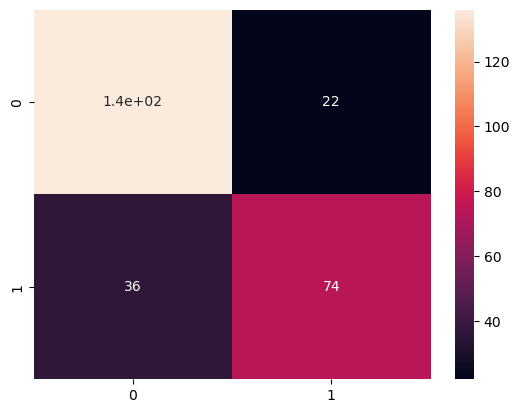

In [36]:
conf=confusion_matrix(ytest,pred)
sns.heatmap(conf,annot=True)
plt.show()

In [37]:
accuracy_score(ytest,pred)

0.7835820895522388